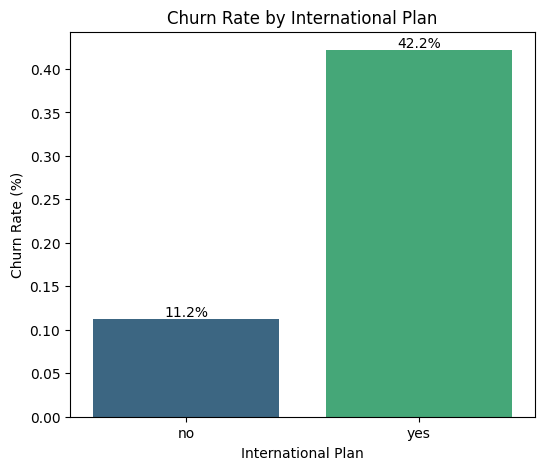

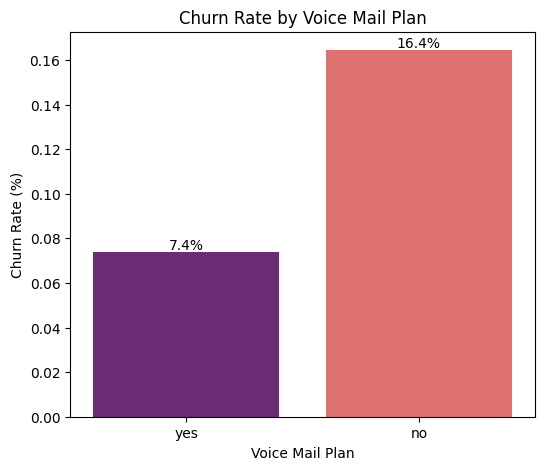

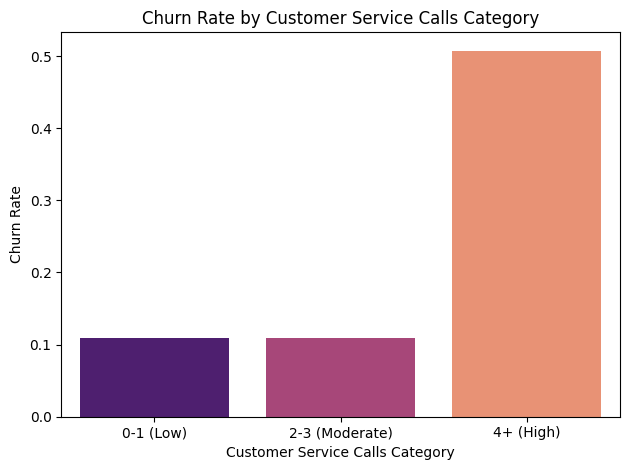

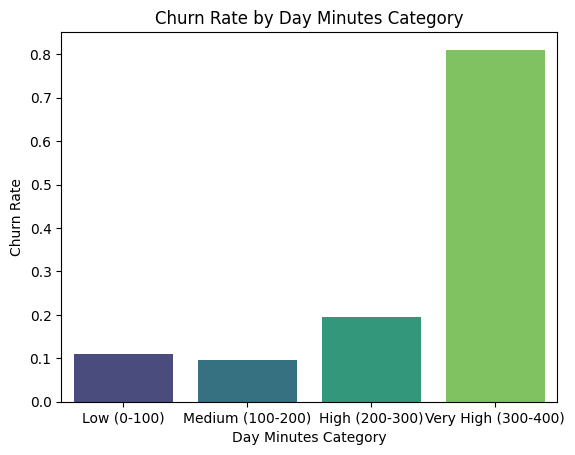

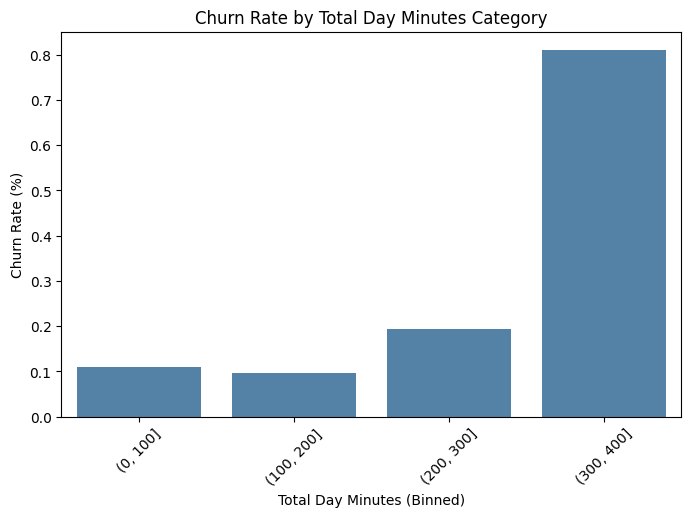

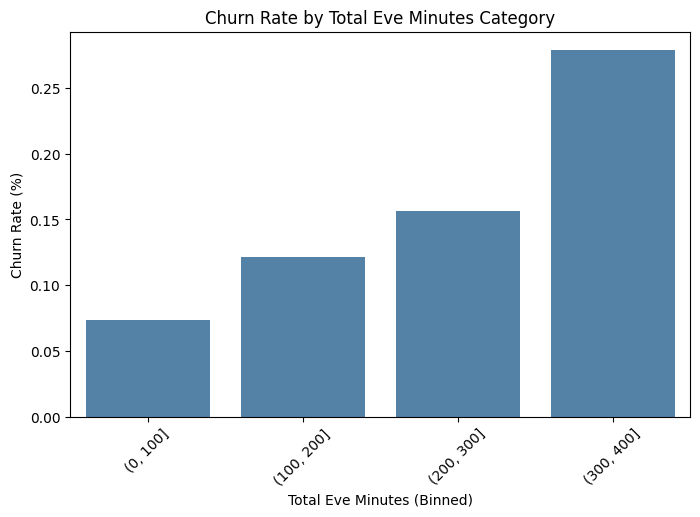

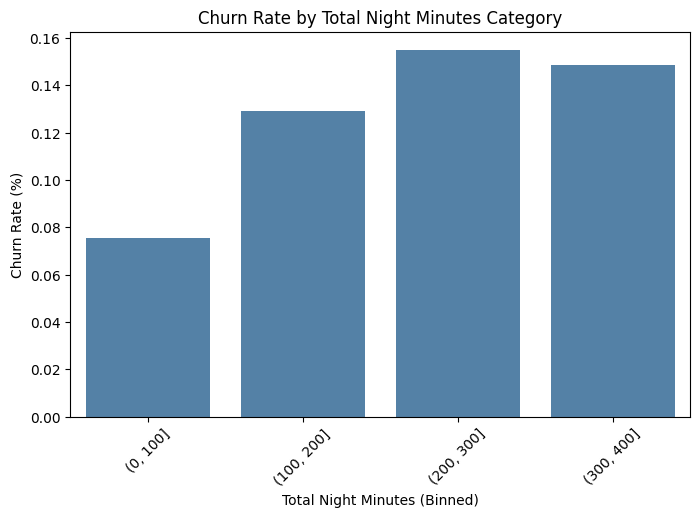

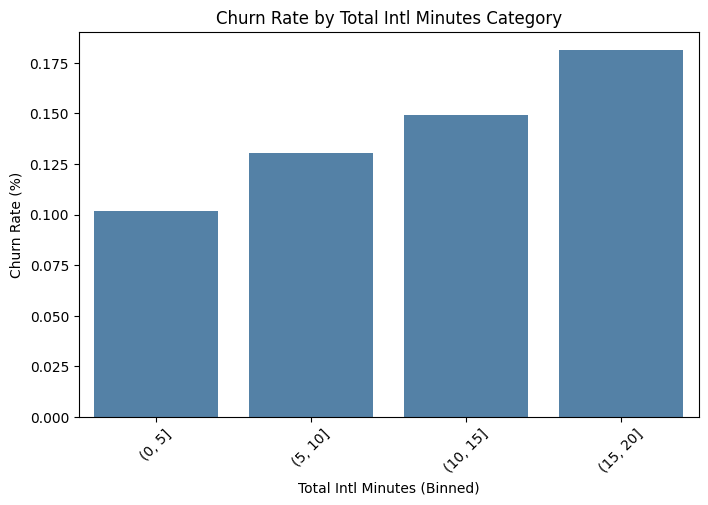

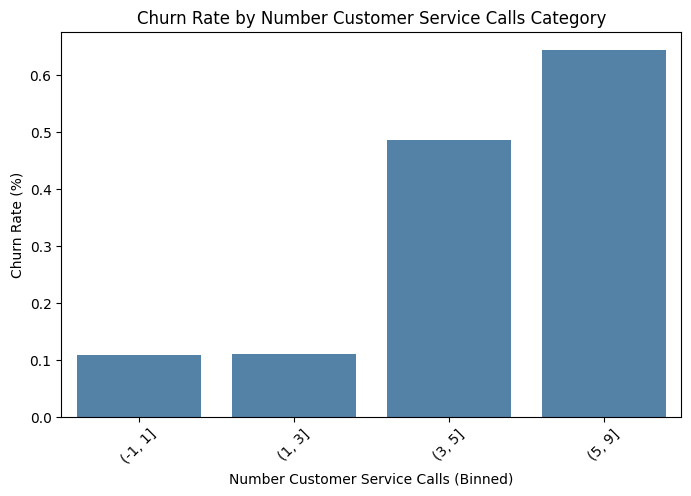

In [ ]:
# Team 6 - Obinna Edeh - AAI - 500
# Ref - Foundations of Statistics for Data Scientists - Alan Agresti and Maria Kateri
# Colab inbuilt Google Gemini for code error syntax assistance and exception handling.
# =========================
# 8. Churn Rate Histograms (Numeric Features)
# =========================

import pandas as pd
import io
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu
import plotly.express as px # Import plotly.express
import plotly.graph_objects as go
from plotly.subplots import make_subplots   # ✅ this was missing

# Load data
df = pd.read_csv('/content/train.csv')

# Add a binary churn column to the DataFrame - moved this up
df["churn_binary"] = df["churn"].map({"no": 0, "yes": 1})

# ---- Plot 1: International Plan ----
plt.figure(figsize=(6,5))
ax1 = sns.barplot(
    data=df, x="international_plan", y="churn_binary",
    hue="international_plan", palette="viridis", legend=False, errorbar=None
)
ax1.set_title("Churn Rate by International Plan")
ax1.set_ylabel("Churn Rate (%)")
ax1.set_xlabel("International Plan")

# Add percentages above bars
for container in ax1.containers:
    ax1.bar_label(container, fmt="%.1f%%", labels=[f"{val*100:.1f}%" for val in container.datavalues])
plt.show()
print()  # adds whitespace in output

# ---- Plot 2: Voice Mail Plan ----
plt.figure(figsize=(6,5))
ax2 = sns.barplot(
    data=df, x="voice_mail_plan", y="churn_binary",
    hue="voice_mail_plan", palette="magma", legend=False, errorbar=None
)
ax2.set_title("Churn Rate by Voice Mail Plan")
ax2.set_ylabel("Churn Rate (%)")
ax2.set_xlabel("Voice Mail Plan")

# Add percentages above bars
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.1f%%", labels=[f"{val*100:.1f}%" for val in container.datavalues])

plt.show()
print()  # adds whitespace in output


# Bin customer service calls
df["service_calls_bin"] = pd.cut(
    df["number_customer_service_calls"],
    bins=[-1, 1, 3, 9],
    labels=["0-1 (Low)", "2-3 (Moderate)", "4+ (High)"]
)

# Churn rate by calls bin
churn_by_calls = df.groupby("service_calls_bin", observed=False)["churn_binary"].mean().reset_index()

# Plot
sns.barplot(
    data=churn_by_calls, x="service_calls_bin", y="churn_binary",
    hue="service_calls_bin", palette="magma", legend=False
)
plt.title("Churn Rate by Customer Service Calls Category")
plt.ylabel("Churn Rate")
plt.xlabel("Customer Service Calls Category")
plt.tight_layout()
plt.show()
print()  # adds whitespace in output

# Create bins for day minutes
df["day_minutes_bin"] = pd.cut(
    df["total_day_minutes"],
    bins=[0, 100, 200, 300, 400],
    labels=["Low (0-100)", "Medium (100-200)", "High (200-300)", "Very High (300-400)"]
)
# Calculate churn rate by bin
churn_by_bin = df.groupby("day_minutes_bin", observed=False)["churn_binary"].mean().reset_index()

# Plot
sns.barplot(
    data=churn_by_bin, x="day_minutes_bin", y="churn_binary",
    hue="day_minutes_bin", palette="viridis", legend=False
)
plt.title("Churn Rate by Day Minutes Category")
plt.ylabel("Churn Rate")
plt.xlabel("Day Minutes Category")
plt.show()
print()

# ---------- Additional Histogram Plots ------------

# Encode churn as binary
df["churn_binary"] = df["churn"].map({"no": 0, "yes": 1})

# Pick key numeric features for churn histograms
features = ["total_day_minutes", "total_eve_minutes", "total_night_minutes",
            "total_intl_minutes", "number_customer_service_calls"]

# Define binning strategy
binning = {
    "total_day_minutes": [0, 100, 200, 300, 400],
    "total_eve_minutes": [0, 100, 200, 300, 400],
    "total_night_minutes": [0, 100, 200, 300, 400],
    "total_intl_minutes": [0, 5, 10, 15, 20],
    "number_customer_service_calls": [-1, 1, 3, 5, 9]
}

# Plot churn rate histograms for each feature
for feature in features:
    df[feature+"_bin"] = pd.cut(df[feature], bins=binning[feature])

    churn_rate_by_bin = df.groupby(feature+"_bin", observed=False)["churn_binary"].mean().reset_index()

    plt.figure(figsize=(8,5))
    sns.barplot(data=churn_rate_by_bin, x=feature+"_bin", y="churn_binary", color="steelblue")
    plt.xticks(rotation=45)
    plt.ylabel("Churn Rate (%)")
    plt.xlabel(feature.replace("_"," ").title() + " (Binned)")
    plt.title(f"Churn Rate by {feature.replace('_',' ').title()} Category")
    plt.show()
    print()
